# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 5
# Supervised Learning: Linear Regression

![image-3.png](attachment:image-3.png)

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Training Model</li>
<li> Predicting</li>
</ol>

## Learning Objectives

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

## Variables
There are 14 attributes in each case of the dataset. They are:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000

11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's (**TARGET**)

By the end of the lab, you should be able to :
- Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

- Parse columns in the dataframe to create new dataframe columns.

- Create and interpret visualizations to explore the data set and relationships between variables
- Create a simple Linear Model to predict Housing prize given features values

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston


# Part 1: Simple Linear Regression

## Loading and Cleaning data with pandas

In [2]:
data = load_boston()
for keys in data:
    print(keys)

data
target
feature_names
DESCR
filename
data_module


/home/cheki/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(data.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [7]:
df.shape

(506, 13)

In [8]:
df['MEDV'] = data.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## EDA

Choose any features to explore relationship with target variables.

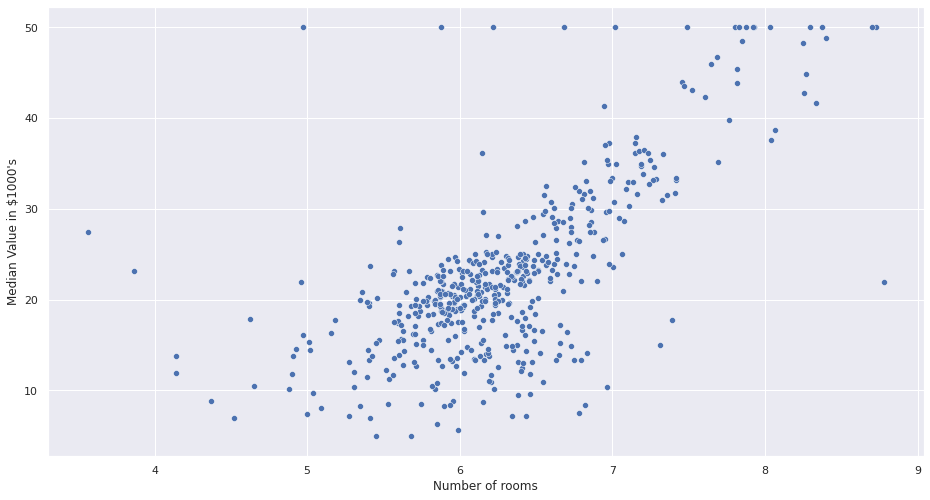

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.scatterplot(data = df,x = 'RM',y = 'MEDV')
plt.xlabel("Number of rooms")
plt.ylabel("Median Value in $1000's")
plt.show()


## Training Model

In [10]:
#create instance of LinearRegression
model = LinearRegression()
model

LinearRegression()

In [11]:
model.fit(np.array(df.RM).reshape(-1,1),df.MEDV)
model

LinearRegression()

In [12]:
model.coef_

array([9.10210898])

In [13]:
model.intercept_

-34.67062077643857

## Prediction

In [14]:
x = np.array([6.25]).reshape(-1,1)
model.predict(x)

array([22.21756036])

## Check MSE

In [15]:
x = np.array(df.RM).reshape(-1,1)

In [16]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x)

In [17]:
MSE = mean_squared_error(df.MEDV,y_pred)

In [18]:
MSE

43.60055177116956

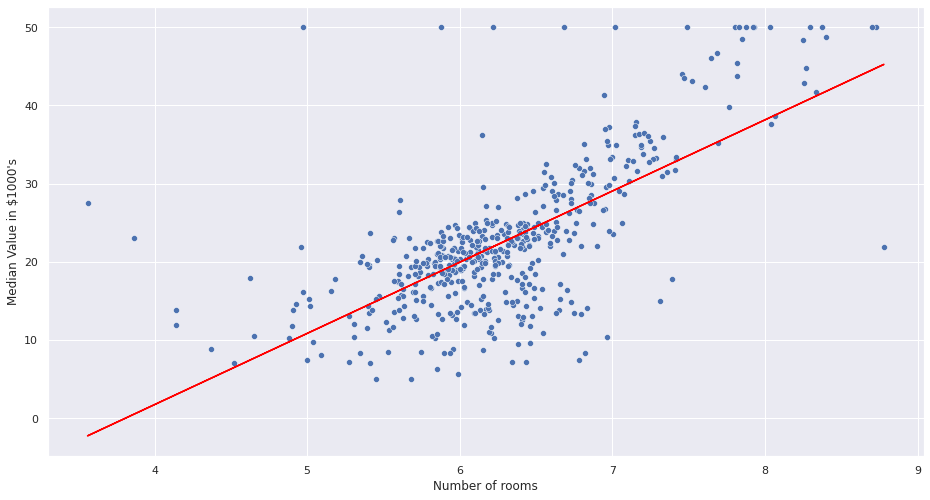

In [19]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.scatterplot(data = df,x = 'RM',y = 'MEDV')
plt.plot(x, y_pred,color='red')
plt.xlabel("Number of rooms")
plt.ylabel("Median Value in $1000's")
plt.show()

# Part 2: Multiple Linear Regression(TODO 5)

## EDA

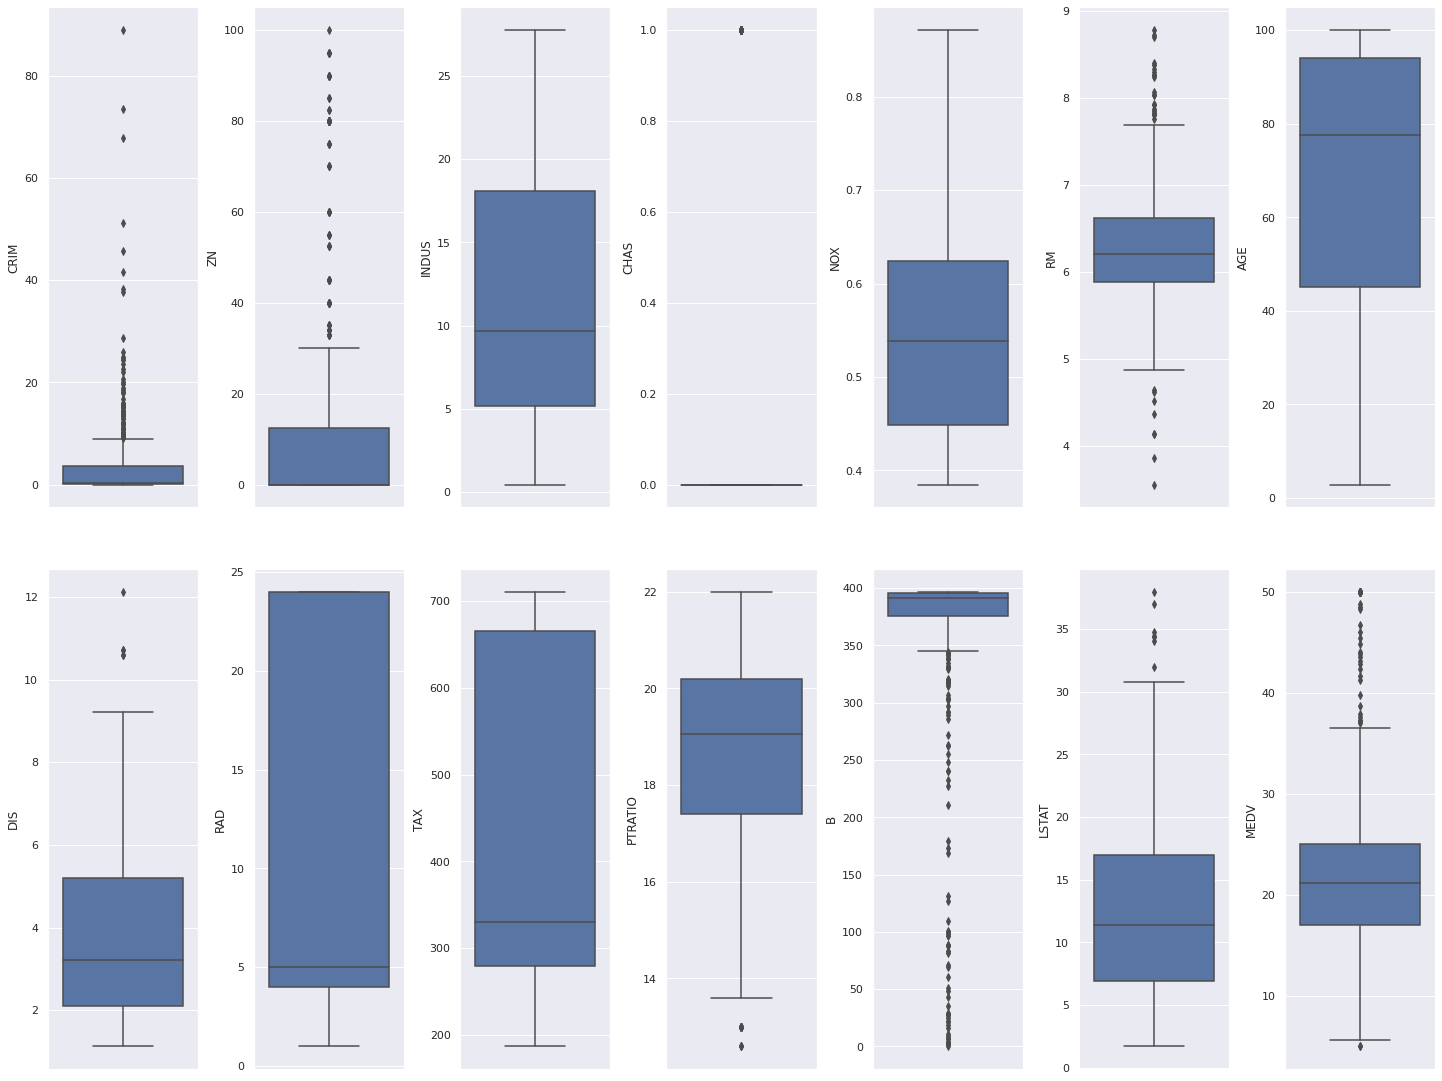

In [20]:
#Creating box plots for all columns to identify outliers
fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(20,15))
index = 0
ax=ax.flatten()

for col, value in df.items():
  sns.boxplot(y=col, data=df, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

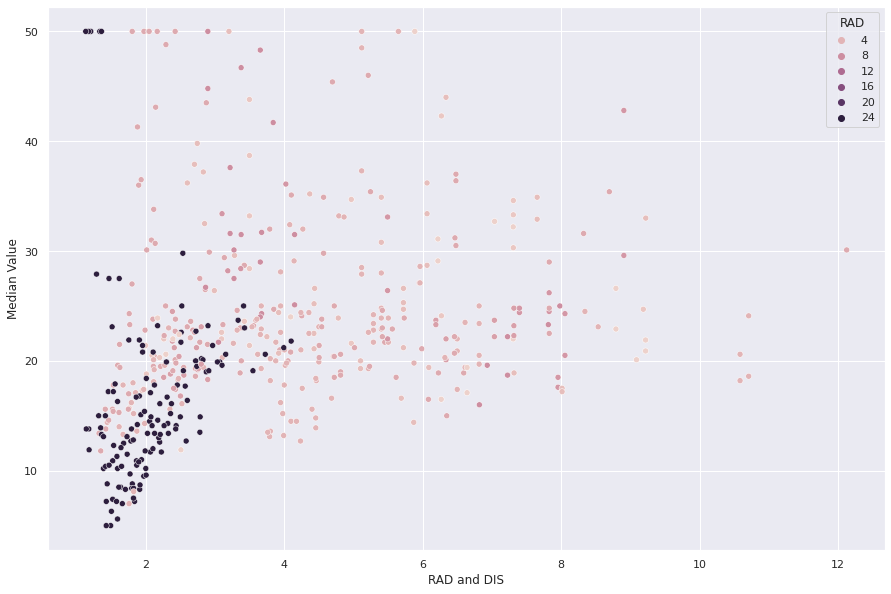

In [21]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=df,x='DIS',y='MEDV', hue='RAD')
plt.xlabel("RAD and DIS")
plt.ylabel("Median Value")
plt.show()

## Training Multiple Regression Model

In [22]:
multi_model = LinearRegression()
multi_model

LinearRegression()

In [23]:
multi_model.fit(np.array(df[['RAD', 'DIS']]).reshape(-1,2), df.MEDV)
multi_model


LinearRegression()

In [24]:
multi_model.coef_

array([-0.36078348,  0.35375457])

In [25]:
multi_model.intercept_

24.635560987477447

In [26]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Predicting Value

In [27]:
x = np.array([3.5, 6.50]).reshape(-1,2)
multi_model.predict(x)

array([25.67222349])

In [28]:
#checking the model using the actual value
x = np.array([1.0,4.0900]).reshape(-1,2)
multi_model.predict(x)

array([25.72163368])